<a href="https://colab.research.google.com/github/nars95/machine_learning/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import librarys that we'll use in our task

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from sklearn.model_selection import train_test_split

In [27]:
train, test = mnist.load_data()

# load the data

In [30]:
# split the data
data = train[0]
y = train[1]
X_test = test[0]
y_test = test[1]

# int to float
data = data.astype(float)
X_test = X_test.astype(float)

# normalize the data

data = data / 255.0
X_test = X_test / 255.0

In [31]:
print(data.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [32]:
print(data.shape, y.shape)

(60000, 28, 28) (60000,)


Split the data into train and validation

In [33]:
X_train, X_val, y_train, y_val = train_test_split(data, y, train_size=0.8, random_state=42)
print(X_train.shape, X_val.shape)

(48000, 28, 28) (12000, 28, 28)


Build our model autoencode.Note that this model is compose of two components:
1. encoder: this part of our model is need to code the information
2. decoder: and this is the part that will reconstruction the information. The output this part is necessary to be the same dimension of the input.

In [35]:
#build the simple autoencoder

encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])

decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=(30,)),
    keras.layers.Dense((28*28), activation='sigmoid'),
    keras.layers.Reshape((28, 28))
])
autoencoder = keras.models.Sequential([encoder, decoder])

Compiling and training the model. Instead pass X_train and y_train, we pass X_train with data and X_train as the labels. This is the simple diference.

In [76]:
autoencoder.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD( learning_rate=1.5))
history = autoencoder.fit(X_train, X_train, epochs=20, validation_data=(X_val,X_val))

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1762 - val_loss: 0.1430
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1329 - val_loss: 0.1262
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1224 - val_loss: 0.1187
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1178 - val_loss: 0.1176
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1154 - val_loss: 0.1157
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1135 - val_loss: 0.1125
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1118 - val_loss: 0.1151
Epoch 8/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1100 - val_loss: 0.1094
Epoch 9/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1073 - val_loss: 0.1064
Epoch 10/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.105

In [77]:
np.average(history.history['loss'])

0.11021093837916851

Let's take a look if our model has learned how to recosntruction our data

In [89]:
def plot_image(image):
  plt.imshow(image, cmap='binary')
  plt.axis('off')

def show_reconstructions(model, n_images = 5):
  reconstructions = model.predict(X_val[:n_images])
  fig = plt.figure(figsize=(n_images*1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1+image_index)
    plot_image(X_val[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 31ms/step


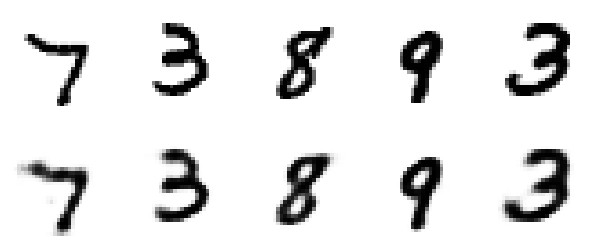

In [90]:
show_reconstructions(autoencoder)